# Libraries

In [1]:
import glob as g
import numpy as np
from matplotlib import cm
import re
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

# Data Points and files

In [2]:
thetx1s = [0.2, 0.4, 0.6, 0.7854, 1.0, 1.2, 1.4]
theta1s = [1.5708]
thetx2s = [0.0, 1.5708]
theta2s = [0.2, 0.4, 0.6, 0.7854, 1.0, 1.2, 1.4]

In [3]:
legend = []
files = []
for i in range(0, 2):
    if i == 0:
        for thetx1 in thetx1s:
            for theta1 in theta1s:
                file = g.glob(f'*{theta1}*{thetx1}*lambda')[0]
                files.append(file)
                l_theta1 = math.sin(theta1)**2
                l_thetx1 = math.sin(thetx1)**2
                legend.append(f'{l_theta1:0.2f}, {l_thetx1:0.2f}')
    if i == 1:
        for thetx2 in thetx2s:
            for theta2 in theta2s:
                file = g.glob(f'*{theta2}*{thetx2}*lambda')[0]
                files.append(file)
                l_theta2 = math.sin(theta2)**2
                l_thetx2 = math.sin(thetx2)**2
                legend.append(f'{l_theta2:0.2f}, {l_thetx2:0.2f}')

In [4]:
data = []
for file in files:
    data_sub = []
    with open(file, 'r') as f:
        for line in f:
            split_line = re.split('\s+', line)
            if split_line[0] == '':
                split_line = split_line[1:-1]
            else:
                split_line = split_line[:-1]
            data_sub.append([int(split_line[0]), float(split_line[2]), float(split_line[4])])
    data.append(data_sub)
            

# Look at the Data

In [5]:
colormap = cm.get_cmap('rainbow_r', len(data))
colors = colormap(np.linspace(0, 1, len(data)))

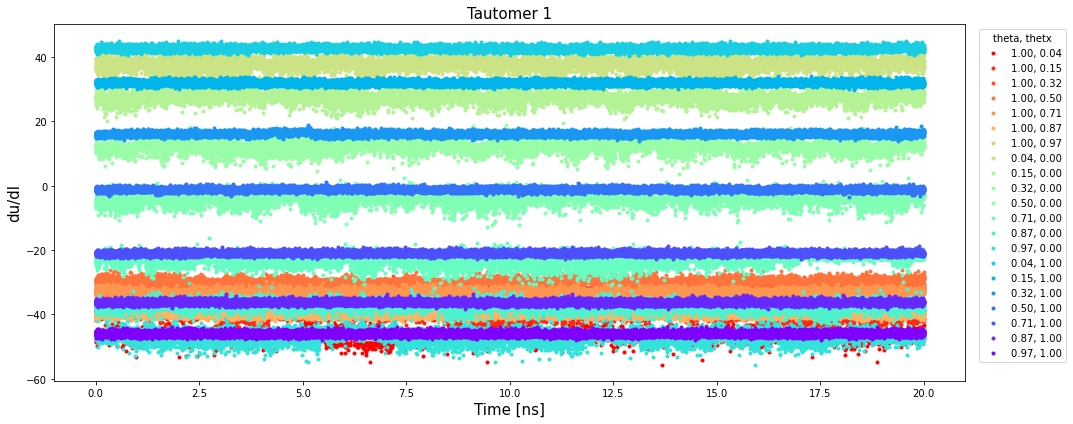

In [6]:
# Fold Cell
plt.close('all')

fig, axes = plt.subplots(figsize=(15, 6))


for i in range(len(data)):
    axes.plot([x/1000 for x in range(len(data[i]))], [y[1] for y in data[i]], '.', color=colors[i])

axes.legend(legend, title='theta, thetx', bbox_to_anchor=(1.01, 1), loc='upper left')
axes.set_title('Tautomer 1', fontsize=15)

axes.set_xlabel('Time [ns]', fontsize=15)
axes.set_ylabel('du/dl', fontsize=15)

#axes.set_xlim(4, 10)
#axes.set_ylim(8, 15)

plt.tight_layout()
plt.show()

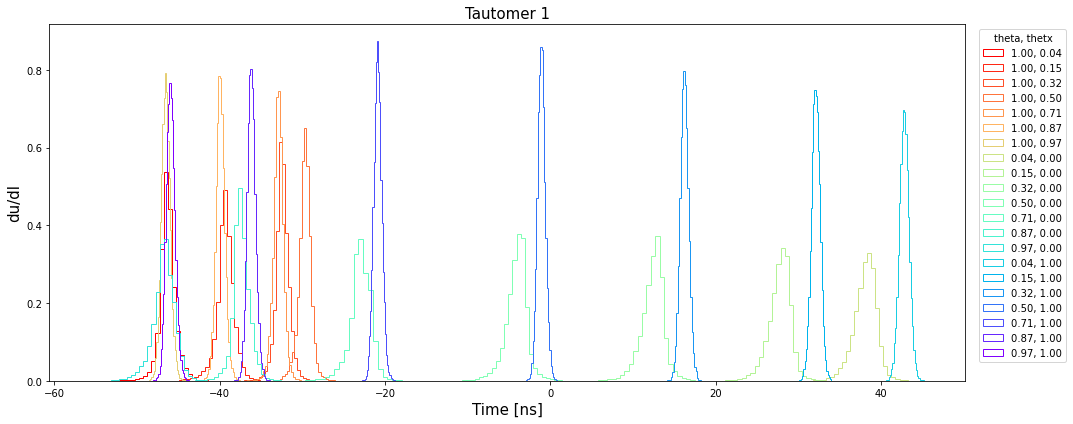

In [7]:
# Fold Cell
plt.close('all')

fig, axes = plt.subplots(figsize=(15, 6))


for i in range(len(data)):
    axes.hist([y[1] for y in data[i]], histtype='step', bins=30, density=True, color=colors[i])

axes.legend(legend, title='theta, thetx', bbox_to_anchor=(1.01, 1), loc='upper left')
axes.set_title('Tautomer 1', fontsize=15)

axes.set_xlabel('Time [ns]', fontsize=15)
axes.set_ylabel('du/dl', fontsize=15)

#axes.set_xlim(4, 10)
#axes.set_ylim(8, 15)

plt.tight_layout()
plt.show()

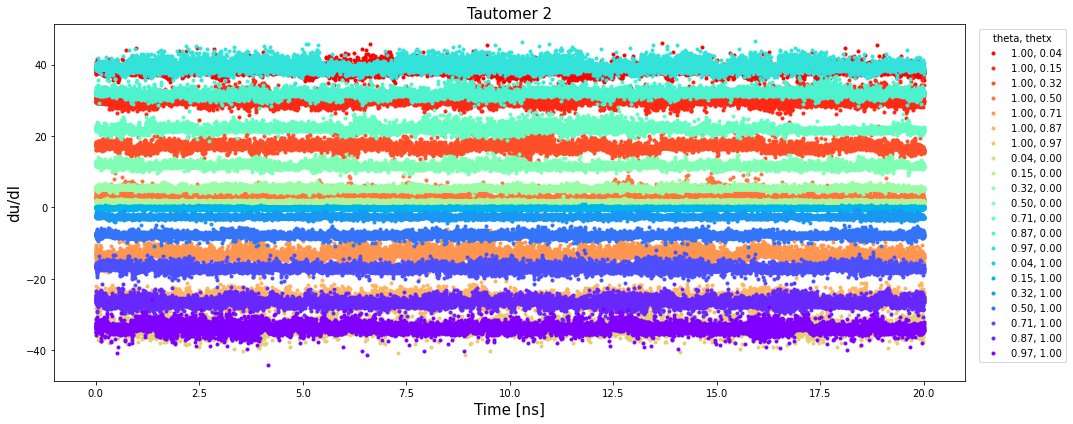

In [8]:
# Fold Cell
plt.close('all')

fig, axes = plt.subplots(figsize=(15, 6))


for i in range(len(data)):
    axes.plot([x/1000 for x in range(len(data[i]))], [y[2] for y in data[i]], '.', color=colors[i])

axes.legend(legend, title='theta, thetx', bbox_to_anchor=(1.01, 1), loc='upper left')
axes.set_title('Tautomer 2', fontsize=15)

axes.set_xlabel('Time [ns]', fontsize=15)
axes.set_ylabel('du/dl', fontsize=15)

#axes.set_xlim(4, 10)
#axes.set_ylim(8, 15)

plt.tight_layout()
plt.show()

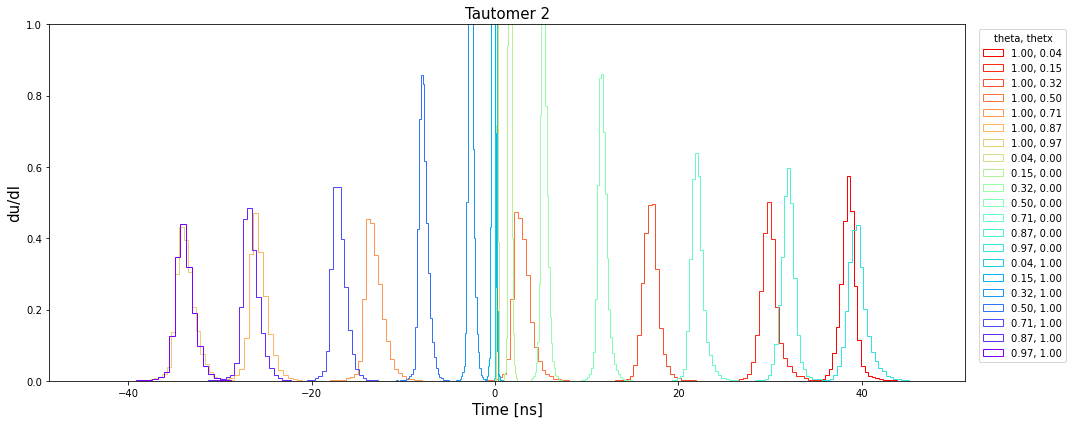

In [9]:
# Fold Cell
plt.close('all')

fig, axes = plt.subplots(figsize=(15, 6))


for i in range(len(data)):
    axes.hist([y[2] for y in data[i]], histtype='step', bins=30, density=True, color=colors[i])

axes.legend(legend, title='theta, thetx', bbox_to_anchor=(1.01, 1), loc='upper left')
axes.set_title('Tautomer 2', fontsize=15)

axes.set_xlabel('Time [ns]', fontsize=15)
axes.set_ylabel('du/dl', fontsize=15)

#axes.set_xlim(4, 10)
axes.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Plots for Fitting

In [10]:
def line(x, m, b):
    y=m*x+b
    return y

In [11]:
final_params = []

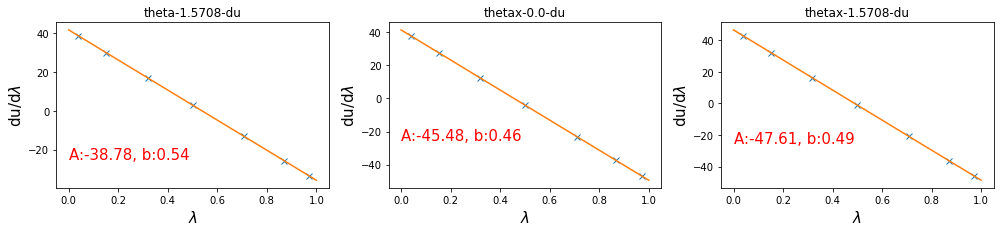

In [16]:
# Fold Cell
plt.close('all')

figcols = 3
figrows = 1
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))

for i in range(figcols):
    xs = [math.sin(x)**2 for x in thetx1s]
    if i == 0:
        ys = [np.mean([y[2] for y in data[y]]) for y in range(7*i, 7*(i+1))]
        axes[i].set_title('theta-1.5708-du')
    else:
        ys = [np.mean([y[1] for y in data[y]]) for y in range(7*i, 7*(i+1))]
    
    if i == 1:
        axes[i].set_title('thetax-0.0-du')
    if i == 2:
        axes[i].set_title('thetax-1.5708-du')
    # Data
    axes[i].plot(xs, ys, 'x')
    # Fit 
    fit, _ = curve_fit(line, xs, ys)
    axes[i].text(0, -25, f'A:{fit[0]/2:0.2f}, b:{-fit[1]/fit[0]:0.2f}', fontsize=15, color='Red')
    final_params.append([f'{fit[0]/2:0.3f}, {-fit[1]/fit[0]:0.3f}'])
    #print(fit)
    # Plot Fit 
    values = []
    for x in np.linspace(0, 1, 7):
        values.append([x, line(x, fit[0], fit[1])])
    axes[i].plot([x[0] for x in values], [y[1] for y in values])
        

    axes[i].set_xlabel('$\lambda$', fontsize=15)
    axes[i].set_ylabel('du/d$\lambda$', fontsize=15)


plt.tight_layout()
plt.savefig('du_dl.png', dpi=360)
plt.show()

In [14]:
final_params

[['-38.781, 0.538'], ['-45.484, 0.456'], ['-47.613, 0.489']]